# PCA of the pre-processed Data:

In [1]:
from sklearn.decomposition import PCA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the data:

In [2]:
very_light_data = pd.read_csv("Data/inverted_OCR.csv")

In [3]:
X_train = very_light_data.drop(columns = ['type', 'Index'])
y_train = very_light_data['type']

In [4]:
X_train.head()

,OTR,OCR,OMR,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,min_lifetime_cancel,med_lifetime_cancel,90_p_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,mean_dt_TV1,NbSecondWithAtLeatOneTrade,Nber_shares_same_day
0,0.440000,0.120000,0.080000,0.000000,419.688500,10.722543,984.320560,23151.83800,25139.598,682.153260,984.32056,23151.8380,1,7,2.750000,9639.216031,4,5
1,0.589404,0.039735,0.046358,0.000074,0.003374,0.000204,8.768699,2671.48830,31278.357,11.866026,177.93991,21433.6840,1,17,5.933333,493.559196,15,5
2,0.674419,0.021142,0.008457,0.000071,0.000599,0.000129,5.725427,448.88360,30799.467,2.761036,187.99548,1953.6235,1,20,5.063492,163.954785,63,4
3,0.586207,0.068966,0.034483,0.000000,6.152666,0.000945,62.444176,19187.71900,19187.719,286.019320,286.01932,19187.7190,1,8,4.250000,1232.562133,4,3
4,0.658879,0.037383,0.000000,0.000071,0.001364,0.000146,2.225420,273.45676,23164.514,2.798452,1345.95280,23164.5140,1,19,3.710526,248.073927,38,1


## Computing the PCA:

In [5]:

pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X_train)


principalDf = pd.DataFrame(data = principalComponents[:,:3],#we only take the first 3 components
             columns = ['principal component 1', 'principal component 2', 'principal component 3'])

principalDf

,principal component 1,principal component 2,principal component 3
0,11194.635207,3755.094200,-1149.085417
1,3234.373943,-7880.974060,-10777.461728
2,-8553.426893,-13351.502879,-47.507309
3,3197.402628,5272.928145,-1032.341067
4,-1382.627397,-1276.757598,-13370.830659
...,...,...,...
105777,-15983.157475,10687.873080,-6306.235380
105778,-26646.960495,10370.836311,485.697507
105779,6208.038817,10845.380324,-23181.791842
105780,87.258598,10711.176376,-18718.910309


In [6]:

targets = pd.DataFrame(data = y_train,
              columns = ['type'])
finalDf = pd.concat([principalDf, targets], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,type
0,11194.635207,3755.094200,-1149.085417,0
1,3234.373943,-7880.974060,-10777.461728,0
2,-8553.426893,-13351.502879,-47.507309,0
3,3197.402628,5272.928145,-1032.341067,0
4,-1382.627397,-1276.757598,-13370.830659,0
...,...,...,...,...
105777,-15983.157475,10687.873080,-6306.235380,0
105778,-26646.960495,10370.836311,485.697507,0
105779,6208.038817,10845.380324,-23181.791842,0
105780,87.258598,10711.176376,-18718.910309,0


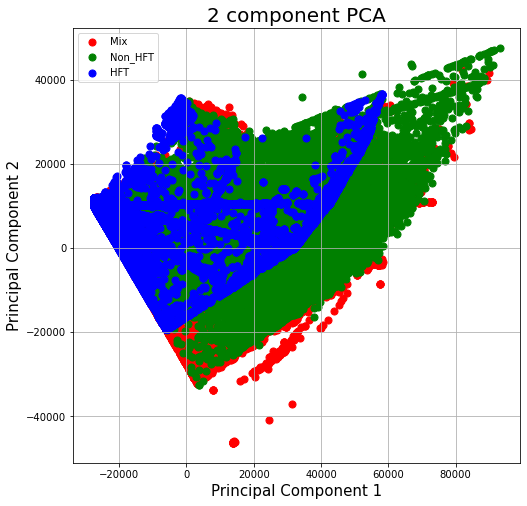

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [-1, 0, 1]
class_name = ['Mix', 'Non_HFT', 'HFT']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = target == finalDf['type']
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(class_name)
ax.grid()

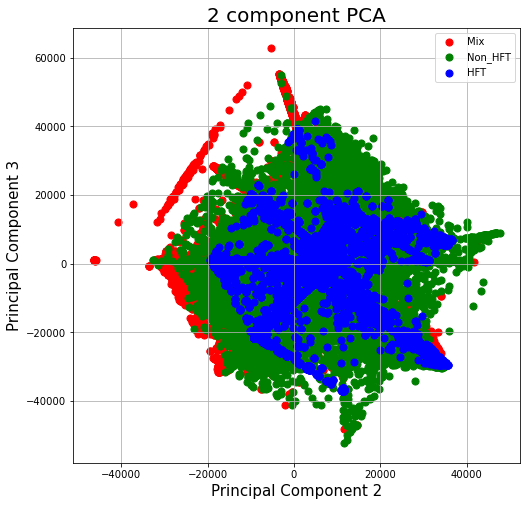

In [8]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for target, color in zip(targets,colors):
    indicesToKeep = target == finalDf['type']
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(class_name)
ax.grid()

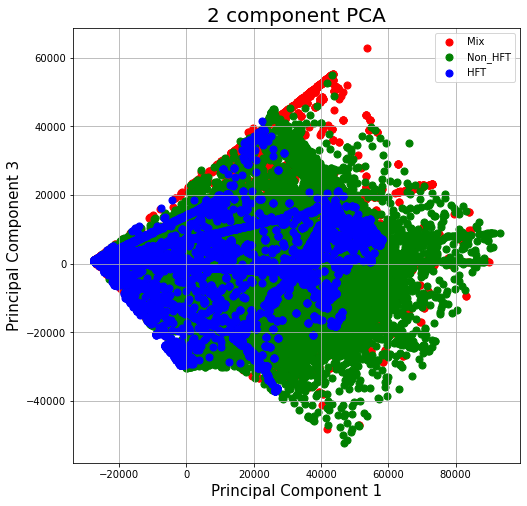

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

for target, color in zip(targets,colors):
    indicesToKeep = target == finalDf['type']
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(class_name)
ax.grid()

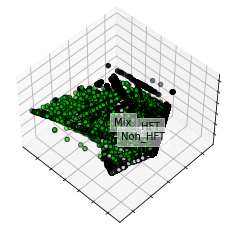

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

targets = [-1, 0, 1]
class_name = ['Mix', 'Non_HFT', 'HFT']
colors = ['r', 'g', 'b']


for target, color in zip(targets,colors):
    indicesToKeep = target == finalDf['type']
    ax.text3D(finalDf.loc[indicesToKeep, 'principal component 1'].mean(),
              finalDf.loc[indicesToKeep, 'principal component 2'].mean() + 1.5,
              finalDf.loc[indicesToKeep, 'principal component 3'].mean(), class_name[target],
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = finalDf['type']

ax.scatter(finalDf.loc[:, 'principal component 1'], finalDf.loc[:, 'principal component 2'], finalDf.loc[:, 'principal component 3'], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

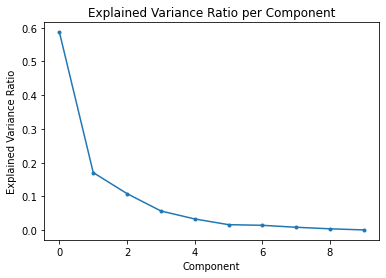

In [11]:
plt.plot(pca.explained_variance_ratio_, ".-")
plt.title("Explained Variance Ratio per Component")
plt.xlabel("Component")
plt.ylabel("Explained Variance Ratio")
plt.show()

#### Percentage of Explained variance by the 3 first components:

In [12]:
print("Percentage of explained variance of the first three components is qual to : {}".format(np.sum(pca.explained_variance_ratio_[:3])))

Percentage of explained variance of the first three components is qual to : 0.8655247149330672


#### First three components are made of:

In [13]:
three_comp = pd.DataFrame(data =pca.components_[:3], columns = X_train.columns)
three_comp

,OTR,OCR,OMR,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,90_p_time_two_events,max_time_two_events,min_lifetime_cancel,med_lifetime_cancel,90_p_lifetime_cancel,NbTradeVenueMic,MaxNbTradesBySecond,MeanNbTradesBySecond,mean_dt_TV1,NbSecondWithAtLeatOneTrade,Nber_shares_same_day
0,5.865763e-07,-2.804607e-06,-8.187482e-07,0.007541,0.068003,0.015682,0.277764,0.486266,0.573615,0.089281,0.240168,0.535478,-0.000032,0.000076,-5.826231e-06,0.005400,-0.003299,0.001365
1,-6.812218e-07,-6.433627e-07,6.719450e-07,0.016761,0.105898,0.029539,0.281391,0.249359,-0.785015,0.215617,0.327046,0.270721,-0.000075,-0.000887,2.733748e-07,0.056565,-0.008450,-0.003375
2,-8.810618e-07,3.041799e-06,-3.843377e-06,0.008080,0.123747,0.029018,0.509516,0.512048,0.002672,-0.172521,-0.246697,-0.609371,0.000035,0.000134,2.071449e-06,-0.003263,0.002373,0.000634


#### `75_p_time_two_events`, `90_p_time_two_events`, `max_time_two_events`, `med_lifetime_cancel`, `90_p_lifetime_cancel` are the most important directions for the first component:

In [14]:
np.linalg.norm(np.array(three_comp.loc[0,['75_p_time_two_events', '90_p_time_two_events', 'max_time_two_events', 'med_lifetime_cancel', '90_p_lifetime_cancel']]))

0.9935087822729444

#### We add `min_lifetime_cancel` to the directions for the second component:

In [18]:
np.linalg.norm(np.array(three_comp.loc[1,['75_p_time_two_events', '90_p_time_two_events', 'max_time_two_events', 'min_lifetime_cancel', 'med_lifetime_cancel', '90_p_lifetime_cancel']]))

0.9921436748468284

#### We add `med_time_two_events` and remove `max_time_two_events` and we get all the main directions for the third component:

In [20]:
np.linalg.norm(np.array(three_comp.loc[2,['75_p_time_two_events', '90_p_time_two_events', 'med_time_two_events', 'min_lifetime_cancel', 'med_lifetime_cancel', '90_p_lifetime_cancel']]))

0.9995343181376137

### PCA Conclusion:

We note that the important **directions** are : </br>
`med_time_two_events`, `75_p_time_two_events`, `90_p_time_two_events`, `max_time_two_events`, `min_lifetime_cancel`, `med_lifetime_cancel`, `90_p_lifetime_cancel`. </br>
They explain the **most** the **variability** in the data. We should consider testing a model with only this data.

### Most important features for the Random tree model:

In [30]:
X_train.iloc[:, [0,1,2,9,17,12,7,8,10,11]]

,OTR,OCR,OMR,min_lifetime_cancel,Nber_shares_same_day,NbTradeVenueMic,90_p_time_two_events,max_time_two_events,med_lifetime_cancel,90_p_lifetime_cancel
0,0.440000,0.120000,0.080000,682.153260,5,1,23151.83800,25139.59800,984.32056,23151.8380
1,0.589404,0.039735,0.046358,11.866026,5,1,2671.48830,31278.35700,177.93991,21433.6840
2,0.674419,0.021142,0.008457,2.761036,4,1,448.88360,30799.46700,187.99548,1953.6235
3,0.586207,0.068966,0.034483,286.019320,3,1,19187.71900,19187.71900,286.01932,19187.7190
4,0.658879,0.037383,0.000000,2.798452,1,1,273.45676,23164.51400,1345.95280,23164.5140
...,...,...,...,...,...,...,...,...,...,...
105777,0.869565,0.043478,0.000000,7609.944300,3,1,1228.04750,7609.94340,7609.94430,7609.9443
105778,0.739130,0.043478,0.000000,567.153000,2,1,307.08710,392.75638,567.15300,567.1530
105779,0.872093,0.011628,0.000000,23448.525000,1,1,4.95412,23448.52500,23448.52500,23448.5250
105780,0.848039,0.004902,0.000000,19157.809000,1,1,119.05335,19157.80900,19157.80900,19157.8090


##### We note that the important features for the random tree and PCA are very similar.